### **Importing the Dataset**

In [22]:
import pandas as pd

# URL of the dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

# Load the dataset
df = pd.read_csv(url)

# Display the first five rows
print(df.head())

     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


# **Data Preparation**

## Data Cleaning

In [23]:
# 1️⃣ Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# 2️⃣ Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# 3️⃣ Fill missing values
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        # Numerical columns - fill with mean
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
    else:
        # Categorical columns - fill with mode
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)

# 4️⃣ Drop duplicate rows
df.drop_duplicates(inplace=True)

print("\nMissing values after filling:\n", df.isnull().sum())
print("\nNumber of duplicate rows after dropping:", df.duplicated().sum())

# Optional: Display the cleaned dataset's first five rows
print("\nFirst five rows of cleaned dataset:\n", df.head())


Missing values in each column:
 model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             3
mpg             0
engineSize      0
price           0
dtype: int64

Number of duplicate rows: 154

Missing values after filling:
 model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64

Number of duplicate rows after dropping: 0

First five rows of cleaned dataset:
      model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12

### Data Augmentation

In [24]:
df.shape

(17812, 9)

In [25]:
!pip install mostlyai

In [26]:
from mostlyai.sdk import MostlyAI

# initialize client
mostly = MostlyAI(api_key='API_KEY_MOSTLYAI', base_url='https://app.mostly.ai')

# fetch configuration via API
sd = mostly.synthetic_datasets.get('63adac0a-4c5a-4e9e-abce-9d20103341b2')
config = sd.config()
config

# consume data
df_aug = sd.data()

Initializing Synthetic Data SDK 4.7.3 in CLIENT mode 📡

Connected to ]8;id=501328;https://app.mostly.ai\https://app.mostly.ai]8;;\ 4.7.2 as jawad.malakandkp@gmail.com

In [27]:
df_aug.shape

(50000, 9)

# **Data Insights and Visulaizations**

In [28]:
!pip install phik

interval columns not set, guessing: ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price']


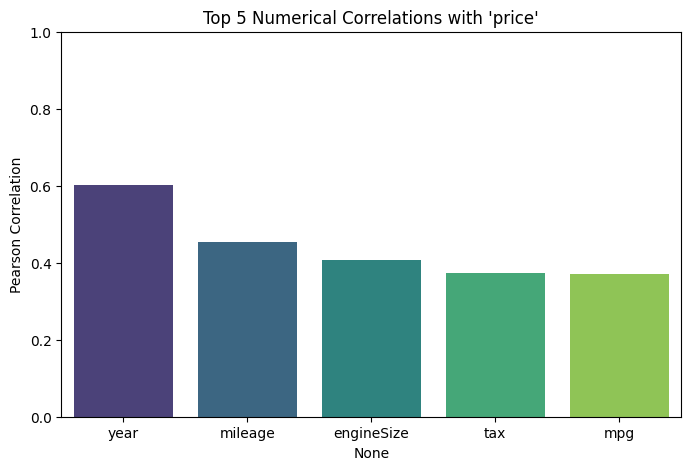

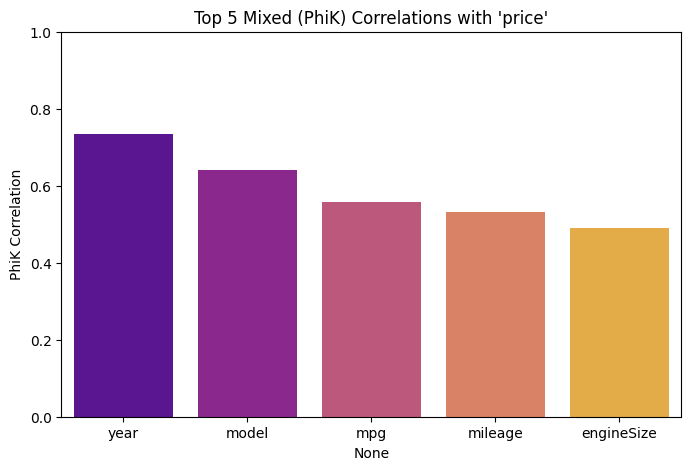

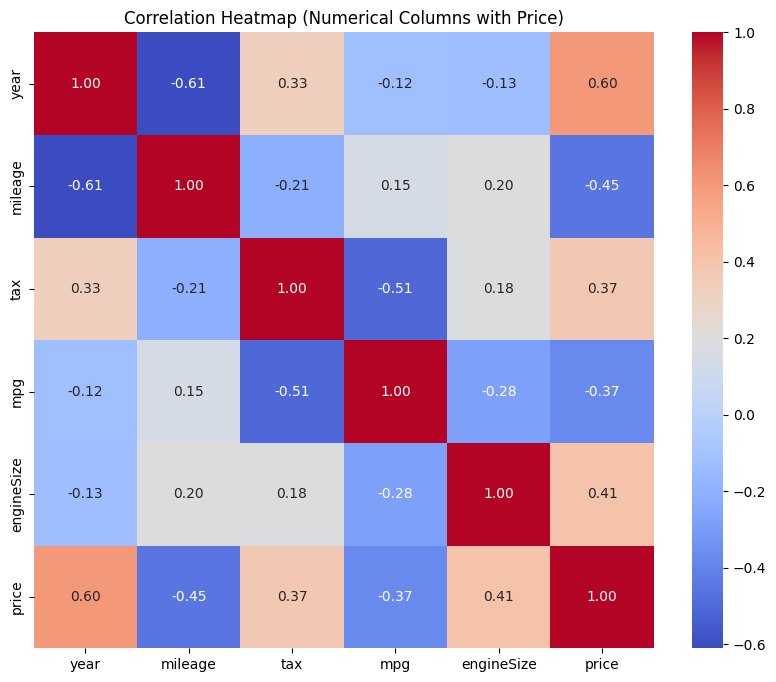

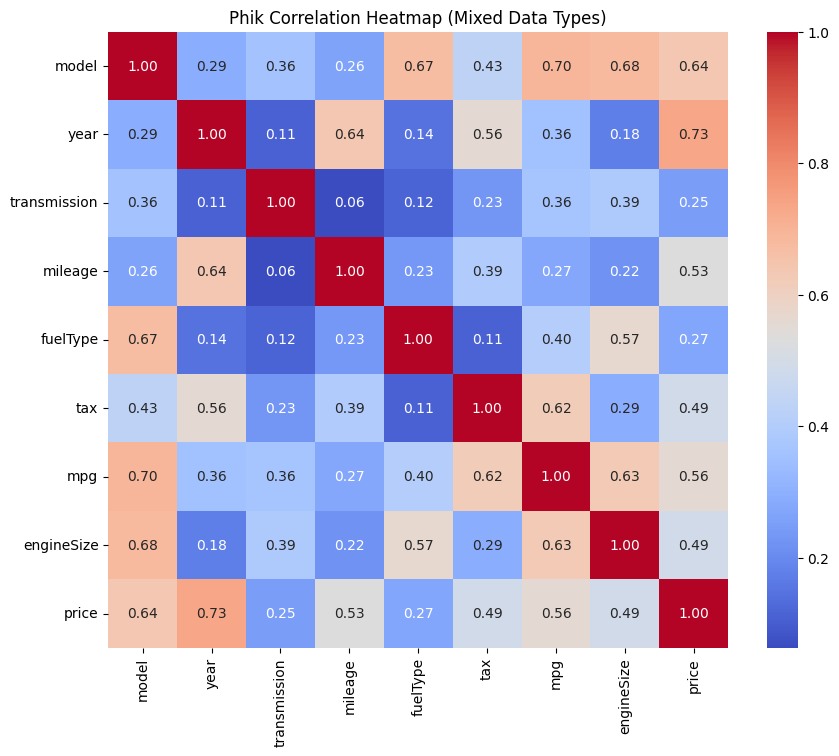

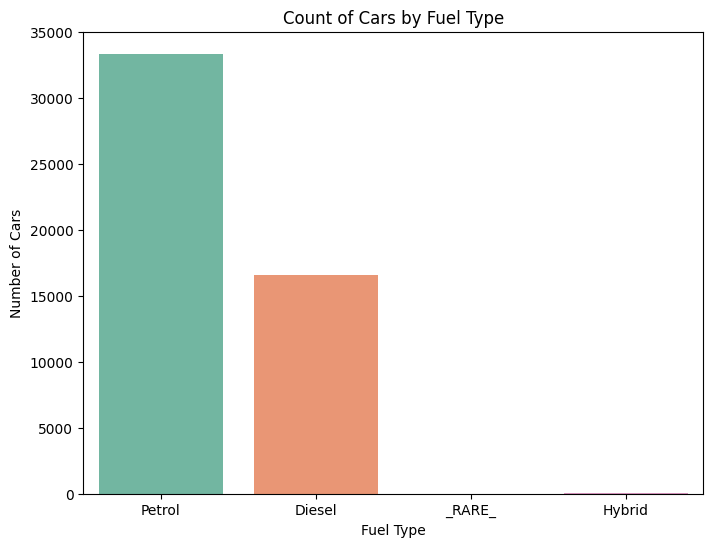

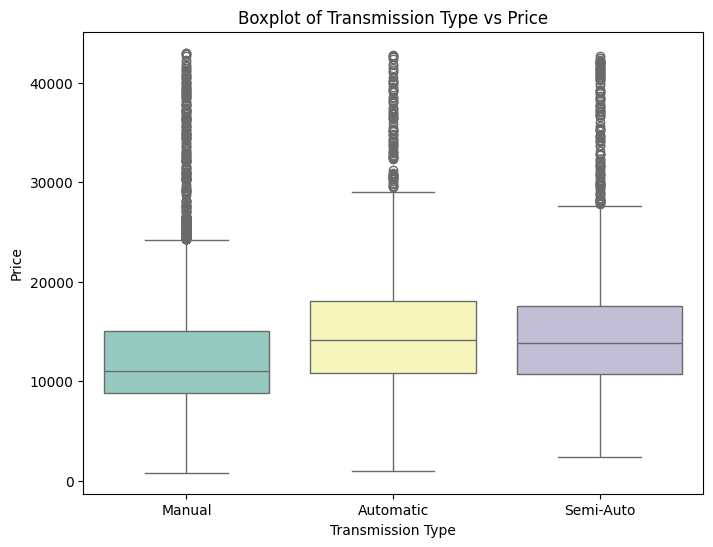

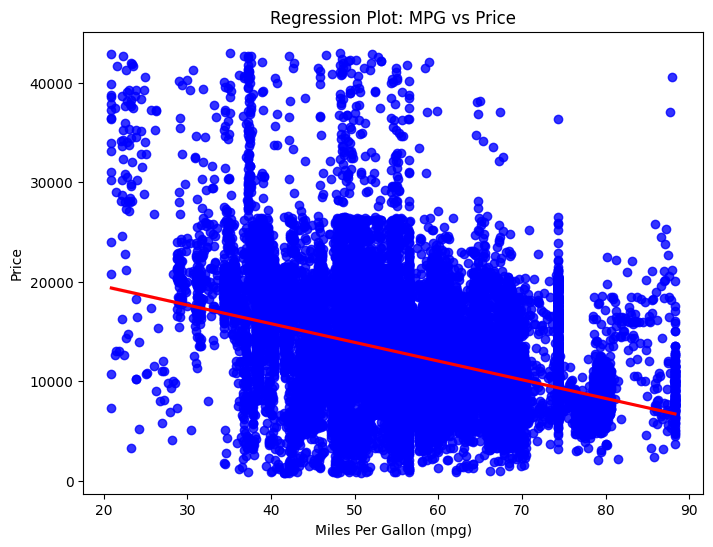

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from phik import phik_matrix


df = df_aug

# Numerical correlation with "price"
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
pearson_corr = df[num_cols].corr()
pearson_corr_sorted = df[num_cols].corr()['price'].abs().sort_values(ascending=False)
pearson_corr_top5 = pearson_corr_sorted[pearson_corr_sorted < 1].head(5)

# PhiK correlation with "price"
phik_corr = df.phik_matrix()
phik_corr_with_price = phik_corr['price'].sort_values(ascending=False)
phik_corr_top5 = phik_corr_with_price[phik_corr_with_price < 1].head(5)

# Plot top 5 numerical (Pearson) correlations with "price"
plt.figure(figsize=(8, 5))
sns.barplot(x=pearson_corr_top5.index, y=pearson_corr_top5.values, palette='viridis')
plt.ylabel("Pearson Correlation")
plt.title("Top 5 Numerical Correlations with 'price'")
plt.ylim(0, 1)
plt.show()

# Plot top 5 mixed (PhiK) correlations with "price"
plt.figure(figsize=(8, 5))
sns.barplot(x=phik_corr_top5.index, y=phik_corr_top5.values, palette='plasma')
plt.ylabel("PhiK Correlation")
plt.title("Top 5 Mixed (PhiK) Correlations with 'price'")
plt.ylim(0, 1)
plt.show()
# -------------------------
# Nummerical Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (Numerical Columns with Price)")
plt.show()

# Mixed Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(phik_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Phik Correlation Heatmap (Mixed Data Types)")
plt.show()

# -------------------------
# Count plot for fuelType
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='fuelType', palette='Set2')
plt.title("Count of Cars by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Number of Cars")
plt.show()

# -------------------------
# Box plot of transmission vs price
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='transmission', y='price', palette='Set3')
plt.title("Boxplot of Transmission Type vs Price")
plt.xlabel("Transmission Type")
plt.ylabel("Price")
plt.show()

# -------------------------
# Regression plot for mpg vs price
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='mpg', y='price', scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Plot: MPG vs Price")
plt.xlabel("Miles Per Gallon (mpg)")
plt.ylabel("Price")
plt.show()

# **Model Development and Evaluation**

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.filterwarnings('ignore')


# 1️⃣ Simple Linear Regression with "mpg"
X_mpg = df[['mpg']]
y = df['price']

lm1 = LinearRegression()
lm1.fit(X_mpg, y)
y_pred_mpg = lm1.predict(X_mpg)

r2_mpg = r2_score(y, y_pred_mpg)
mse_mpg = mean_squared_error(y, y_pred_mpg)

print("\n🔷 Linear Regression (using mpg only):")
print("R^2:", r2_mpg)
print("MSE:", mse_mpg)

# 2️⃣ Multiple Linear Regression
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
X_multi = df[features]

lm2 = LinearRegression()
lm2.fit(X_multi, y)
y_pred_multi = lm2.predict(X_multi)

r2_multi = r2_score(y, y_pred_multi)
mse_multi = mean_squared_error(y, y_pred_multi)

print("\n🔷 Multiple Linear Regression (using year, mileage, tax, mpg, engineSize):")
print("R^2:", r2_multi)
print("MSE:", mse_multi)

# 3️⃣ Pipeline: StandardScaler, PolynomialFeatures(degree=2), LinearRegression
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('linreg', LinearRegression())
])
pipe.fit(X_multi, y)
y_pred_pipe = pipe.predict(X_multi)

r2_pipe = r2_score(y, y_pred_pipe)
mse_pipe = mean_squared_error(y, y_pred_pipe)

print("\n🔷 Pipeline (Scaler + Polynomial(2) + Linear Regression):")
print("R^2:", r2_pipe)
print("MSE:", mse_pipe)

# 4️⃣ Ridge Regression with train-test split
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
r2_ridge_test = ridge_model.score(X_test, y_test)

print("\n🔷 Ridge Regression (alpha=0.1) on test data:")
print("R^2 (Test Data):", r2_ridge_test)

# 5️⃣ Polynomial Features + Ridge Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge_poly_model = Ridge(alpha=0.1)
ridge_poly_model.fit(X_train_poly, y_train)
y_pred_poly_ridge = ridge_poly_model.predict(X_test_poly)

r2_poly_ridge = r2_score(y_test, y_pred_poly_ridge)
mse_poly_ridge = mean_squared_error(y_test, y_pred_poly_ridge)

print("\n🔷 Polynomial(2) + Ridge Regression (alpha=0.1):")
print("R^2 (Test Data):", r2_poly_ridge)
print("MSE (Test Data):", mse_poly_ridge)

# 6️⃣ Grid Search for Ridge Regression (alpha values)
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = Ridge()
grid = GridSearchCV(ridge_grid, param_grid, cv=4)
grid.fit(X_train_poly, y_train)

best_alpha = grid.best_params_['alpha']
best_score = grid.best_score_

print("\n🔷 Grid Search for Ridge Regression:")
print("Best alpha:", best_alpha)
print("Best CV R^2 Score:", best_score)



🔷 Linear Regression (using mpg only):
R^2: 0.13812239443601948
MSE: 20083551.776227523

🔷 Multiple Linear Regression (using year, mileage, tax, mpg, engineSize):
R^2: 0.6566658670210845
MSE: 8000403.760016669

🔷 Pipeline (Scaler + Polynomial(2) + Linear Regression):
R^2: 0.6951083965911908
MSE: 7104612.376128493

🔷 Ridge Regression (alpha=0.1) on test data:
R^2 (Test Data): 0.6577210709890743

🔷 Polynomial(2) + Ridge Regression (alpha=0.1):
R^2 (Test Data): 0.6929894568084425
MSE (Test Data): 7052174.972826841

🔷 Grid Search for Ridge Regression:
Best alpha: 0.01
Best CV R^2 Score: 0.6926571579392357
